In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import sleep
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from PIL import Image
#from PIL import ImageGrab
import glob

import warnings
warnings.filterwarnings('ignore')

In [4]:
# klasördeki resimleri images sözlüğüne atıyoruz
images={}
for filename in glob.glob('res_512/*.jpg'): #assuming gif
    im=Image.open(filename)
    im_name=filename.upper().split("\\")[1].split(".")[0]
    #print(im_name)
    images[im_name]=im

In [5]:
def beyaz_ekran():
    img_1=np.random.choice(np.random.choice(list(images.values()), 1))
    df_img1=pd.DataFrame(np.array(img_1.getdata())).iloc[:]
    df_img1.iloc[:,:]=[255,255,255]
    img_1=Image.fromarray(np.uint8(np.array(df_img1).reshape(512,512,3)))
    return img_1
def resim_degistir(kare_boyutu):
    img_1=beyaz_ekran()
            
    
    # yeni bir resim seçiyoruz
    img_2=np.random.choice(np.random.choice(list(images.values()), 1))
    vals_orj=[]
    x=kare_boyutu
    for i in range(0,x):
        for j in range(0,x):
            val2=[]
            for ki in range((512//x)):
                for kj in range(512//x):
                    #val2x=(i+ki)*8*512+(j*8*64+kj)
                    val2x=(i)*(512//x)*512+(j*(512//x))+ki*512+kj
                    val2.append(val2x)
            vals_orj.append(val2)

    width, height = img_1.size
    pixels1 = np.array(img_1.getdata())
    df_img1=pd.DataFrame(pixels1).iloc[:]

    pixels2 = np.array(img_2.getdata())
    df_img2=pd.DataFrame(pixels2).iloc[:]
    vals=vals_orj[:]
    degisen=[]
    for i in range(10000):
        if len(degisen)==len(vals_orj):
            break
        indexs_id=np.random.choice(len(vals), 1)
        indexs=vals[indexs_id[0]]
        degisen.append(indexs_id[0])
        vals.pop(indexs_id[0])
        df_img1.iloc[indexs,:]=df_img2.iloc[indexs,:]

        if i%(len(vals_orj)//15)==0:
            imgs=Image.fromarray(np.uint8(np.array(df_img1).reshape(512,512,3)))
            #sleep(0.01)
            clear_output(wait=True)
            plt.figure(figsize=(7,7))
            plt.imshow(imgs)
            plt.show()

    clear_output(wait=True)
    imgs=Image.fromarray(np.uint8(np.array(df_img1).reshape(512,512,3)))
    plt.figure(figsize=(7,7))
    plt.imshow(imgs)
    plt.show()
    
    for isim,img in images.items():
        if img==img_2:
            break
    print(isim)    
    return img_2,isim

#img_1,isim=resim_degistir(64)

In [6]:
panda = """
    panda

              .;;.
             /;;;;\  ___      .;;..
            |;(;;;-""   `'-.,;;;;;/
             \;'            ';;;);/
             /                \;;'
            /    .;.   .;.     \/
            |   ;;o;; ;;o;;    |
            ;   '"-'` `'-"'    |
            /\      ._.       /
          ;;;;;_   ,_Y_,   _.'
         /;;;;;\`--.___.--;.
        /|;;;;;;;.__.;;;.  \/\/
       ;  \;;;;;;;;;;;;;;\  ;\__  .;.
       |   ';;;;;;;;=;;;;'  |-__;;;;/
       |     `""`  .---._  /;/;;\;;/
      / ;         /;;;;;;;-;/;;/|;/
      \_,\       |;;;;;;;;;;;;| |
          '-...--';;;;;;;;;;;;\/
                   `\"""`   `"`
    
                                              MERGE & JOIN &  CONCAT (Dataframe leri birleştirmek) """
print(panda)


    panda

              .;;.
             /;;;;\  ___      .;;..
            |;(;;;-""   `'-.,;;;;;/
             \;'            ';;;);/
             /                \;;'
            /    .;.   .;.     \/
            |   ;;o;; ;;o;;    |
            ;   '"-'` `'-"'    |
            /\      ._.       /
          ;;;;;_   ,_Y_,   _.'
         /;;;;;\`--.___.--;.
        /|;;;;;;;.__.;;;.  \/\/
       ;  \;;;;;;;;;;;;;;\  ;\__  .;.
       |   ';;;;;;;;=;;;;'  |-__;;;;/
       |     `""`  .---._  /;/;;\;;/
      / ;         /;;;;;;;-;/;;/|;/
      \_,\       |;;;;;;;;;;;;| |
          '-...--';;;;;;;;;;;;\/
                   `"""`   `"`
    
                                              MERGE & JOIN &  CONCAT (Dataframe leri birleştirmek) 


######################
#      CONCAT        #
######################

**index'i ve kolonu ortak olmayan dataframe'leri birlestirilebilir**

1. axis=0 , axis=1 >>>> default 0
2. ignore_index : bool, default False
3. join{‘inner’, ‘outer’}, default ‘outer’
4. ikiden fazla df i birleştirmek istersek



In [16]:
df1 = pd.DataFrame({'df1_1': ['a', 'b', 'c'],
                    'df1_2': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'df2_1': ['x', 'y', 'z'],
                    'df2_1': range(10,13)},
                   index=['index_11','index_12','index_13'])
df1

,df1_1,df1_2
index_1,a,1
index_2,b,2
index_3,c,3


In [17]:
df2

,df2_1
index_11,10
index_12,11
index_13,12


In [308]:
pd.concat([df1, df2])

,df1_1,df1_2,df2_1
index_1,a,1.0,NaN
index_2,b,2.0,NaN
index_3,c,3.0,NaN
index_11,NaN,NaN,10.0
index_12,NaN,NaN,11.0
index_13,NaN,NaN,12.0


In [65]:
df1 = pd.DataFrame({'anahtar': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])
df1

,anahtar,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [66]:
df2

,anahtar,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


## axis=0 , axis=1   >>>> default 0

In [109]:
# default mode  ==  axis=0
pd.concat([df1, df2])

,anahtar,df1_col1,df2_col2
index_1,a,1.0,NaN
index_2,b,2.0,NaN
index_3,c,3.0,NaN
index_2,b,NaN,2.0
index_3,c,NaN,3.0
index_4,d,NaN,4.0


In [110]:
# concat() methodu ön tanimli olarak verileri satirlara gore birlestirir.
# eger sutun olarak birlestirmek istersek:

# axis=1 olursa
pd.concat([df1, df2],axis=1)

,anahtar,df1_col1,anahtar,df2_col2
index_1,a,1.0,NaN,NaN
index_2,b,2.0,b,2.0
index_3,c,3.0,c,3.0
index_4,NaN,NaN,d,4.0


## ignore_index : bool, default False

In [123]:
# Pandas taki Series ve DataFrame veri yapilarinin indexleri vardir.
## !!!! Pandasta farkli indexlere sahip verileri birlestirmek icin concat() kullanilir.

# default mode : ignore_index=False
pd.concat([df1, df1], ignore_index=False)

,anahtar,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3
index_1,a,1
index_2,b,2
index_3,c,3


In [113]:
# ignore_index=True olursa    , # default mode : ignore_index=False
pd.concat([df1, df1], ignore_index=True)

,anahtar,df1_col1
0,a,1
1,b,2
2,c,3
3,a,1
4,b,2
5,c,3


## join{‘inner’, ‘outer’}, default ‘outer’

In [116]:
# join="outer" olursa   # default mode=join="outer"
pd.concat([df1, df2], join="outer")

,anahtar,df1_col1,df2_col2
index_1,a,1.0,NaN
index_2,b,2.0,NaN
index_3,c,3.0,NaN
index_2,b,NaN,2.0
index_3,c,NaN,3.0
index_4,d,NaN,4.0


In [69]:
pd.concat([df1, df2], axis=1)

,anahtar,df1_col1,anahtar,df2_col2
index_1,a,1.0,NaN,NaN
index_2,b,2.0,b,2.0
index_3,c,3.0,c,3.0
index_4,NaN,NaN,d,4.0


In [73]:
pd.concat([df1, df2], axis=1, ignore_index=True)

,0,1,2,3
index_1,a,1.0,NaN,NaN
index_2,b,2.0,b,2.0
index_3,c,3.0,c,3.0
index_4,NaN,NaN,d,4.0


In [125]:
# default mode=join="outer"
pd.concat([df1, df2])

,anahtar,df1_col1,df2_col2
index_1,a,1.0,NaN
index_2,b,2.0,NaN
index_3,c,3.0,NaN
index_2,b,NaN,2.0
index_3,c,NaN,3.0
index_4,d,NaN,4.0


In [74]:
pd.concat([df1, df2], ignore_index=True)

,anahtar,df1_col1,df2_col2
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,b,NaN,2.0
4,c,NaN,3.0
5,d,NaN,4.0


In [115]:
# ortak degerleri gormek istersek join='inner' argumani kullanilir.

# join="inner" olursa
pd.concat([df1, df2], join="inner")

,anahtar
index_1,a
index_2,b
index_3,c
index_2,b
index_3,c
index_4,d


## ikiden fazla df i birleştirmek istersek

In [20]:
# ikiden fazla df i birleştirmek istersek
pd.concat([df1, df2, df2], axis=0)

,anahtar,df1_col1,df2_col2
index_1,a,1.0,NaN
index_2,b,2.0,NaN
index_3,c,3.0,NaN
index_2,b,NaN,2.0
index_3,c,NaN,3.0
index_4,d,NaN,4.0
index_2,b,NaN,2.0
index_3,c,NaN,3.0
index_4,d,NaN,4.0


## Örnek concat kullanımı

In [21]:
# yıllara göre farklı değerler içerdiğini düşündüğümüz dataframeler oluşturup kaydedelim
for i in range(5):
    dfx = pd.DataFrame(np.arange(i*10,(i+1)*10).reshape(2, 5))
    col1=2010+i*2
    col2=2010+i*2+1
    dfx.index=[col1,col2]
    dfx.columns=["customer_id","product_id","item_id","item_price","sales"]
    dfx_name="dfx_"+str(i)+(".csv")
    dfx.to_csv(dfx_name)

In [22]:
pd.read_csv('dfx_0.csv',index_col=0)

,customer_id,product_id,item_id,item_price,sales
2010,0,1,2,3,4
2011,5,6,7,8,9


In [24]:
pd.read_csv('dfx_1.csv',index_col=0)

,customer_id,product_id,item_id,item_price,sales
2012,10,11,12,13,14
2013,15,16,17,18,19


In [61]:
DirtySalesDate

['dfx_0.csv', 'dfx_1.csv', 'dfx_2.csv', 'dfx_3.csv', 'dfx_4.csv']

In [25]:
# Ve bunlari birlestirip okutmak istiyorum.

from glob import glob
DirtySalesDate = sorted(glob('*.csv'))
DirtySalesDate

df = pd.concat((pd.read_csv(file,index_col=0)) for file in DirtySalesDate)
df

,customer_id,product_id,item_id,item_price,sales
2010,0,1,2,3,4
2011,5,6,7,8,9
2012,10,11,12,13,14
2013,15,16,17,18,19
2014,20,21,22,23,24
2015,25,26,27,28,29
2016,30,31,32,33,34
2017,35,36,37,38,39
2018,40,41,42,43,44
2019,45,46,47,48,49


In [15]:
df.shape

(10, 5)

## Örnek concat kullanımı Yöntemi 2

In [137]:
df=pd.DataFrame()
for name in DirtySalesDate:
    df = pd.concat([df,pd.read_csv(name,index_col=0)])
df

,customer_id,product_id,item_id,item_price,sales
2010,0,1,2,3,4
2011,5,6,7,8,9
2012,10,11,12,13,14
2013,15,16,17,18,19
2014,20,21,22,23,24
2015,25,26,27,28,29
2016,30,31,32,33,34
2017,35,36,37,38,39
2018,40,41,42,43,44
2019,45,46,47,48,49


In [ ]:
#Soru 1: concat() methodu için join argümanının işlevi nelerdir? Default değeri nedir? 

In [ ]:
#Soru 2: pd.concat(df1,df2) biçiminde birleştirilmiş olan 2 DataFramein nasıl birleşmesi beklenir?

# A - sütunlara göre
# B - satırlara göre

# Nedenini açıklayınız.

In [ ]:
# Soru 3: concat() methodunun bir argümanı olan ignore_index='' ne sebeple kullanilir? Default degeri nedir?

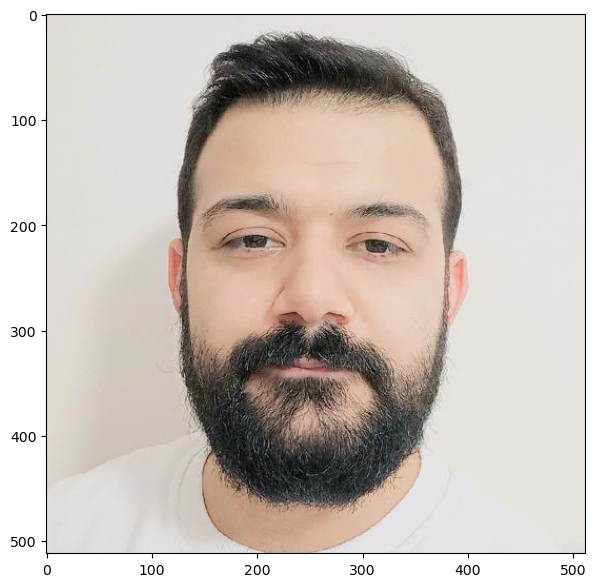

ÖMER


In [72]:
# Süpriz sorularımız olacak
# Acaba kime soracaz ????
# Sen olabilir misin ?????
img_1,isim=resim_degistir(64)

################################
# ---------MERGE--------- #
################################

**kolon odaklı birleştirme yapıyor**

1. on='.....'
2. left_on='anahtar1', right_on='anahtar2'
3. how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
4. suffixes : list-like, default is (“_x”, “_y”)
5. on=["...","..."] ile çoklu kolon kullanımı
6. right_index=True, left_index=True




In [39]:
df1 = pd.DataFrame({'anahtar': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])
df1

,anahtar,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [148]:
df2

,anahtar,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


## on='.....'

In [40]:
# merge() fonksiyonunu kullanarak bu iki DataFrame i birleştirelim..
# DataFrame de ortak olarak 'anahtar' degiskeni oldugundan otomatik olarak ona gore birlestirdi.
pd.merge(df1, df2)

,anahtar,df1_col1,df2_col2
0,b,2,2
1,c,3,3


In [41]:
pd.merge(df1, df2, on='anahtar')

,anahtar,df1_col1,df2_col2
0,b,2,2
1,c,3,3


## left_on='anahtar1', right_on='anahtar2'

In [81]:
df1.columns=["anahtar1","df1_col1"]
df2.columns=["anahtar2","df1_col2"]

In [33]:
df1

,anahtar1,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [34]:
df2

,anahtar2,df1_col2
index_2,b,2
index_3,c,3
index_4,d,4


In [82]:
pd.merge(df1, df2, left_on='anahtar1', right_on='anahtar2')

,anahtar1,df1_col1,anahtar2,df1_col2
0,b,2,b,2
1,c,3,c,3


In [83]:
pd.merge(df2, df1, left_on='anahtar2', right_on='anahtar1')


MergeError: Must pass "right_on" OR "right_index".

## how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

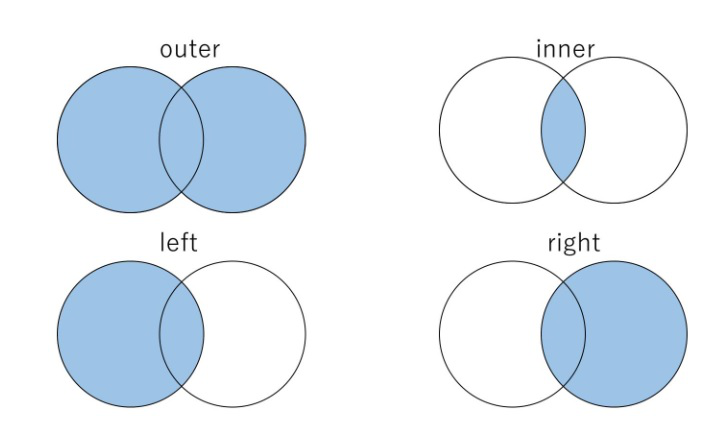

In [168]:
Image.open("merge.jpg")

In [46]:
# Dikkat ettiyseniz a ve d degerleri karsiligi olmadigi icin ekrana yazdirilmadi.
# Buna ragmen birlestirme yapmak istersek outer opsiyonunu kullanabiliriz:
pd.merge(df1, df2, left_on='anahtar1', right_on='anahtar2', how='outer')

,anahtar1,df1_col1,anahtar2,df1_col2
0,a,1.0,NaN,NaN
1,b,2.0,b,2.0
2,c,3.0,c,3.0
3,NaN,NaN,d,4.0


In [47]:
pd.merge(df1, df2, left_on='anahtar1', right_on='anahtar2', how='left')

,anahtar1,df1_col1,anahtar2,df1_col2
0,a,1,NaN,NaN
1,b,2,b,2.0
2,c,3,c,3.0


In [48]:
pd.merge(df1, df2, left_on='anahtar1', right_on='anahtar2', how='inner')  # Varsayilan how='inner'

,anahtar1,df1_col1,anahtar2,df1_col2
0,b,2,b,2
1,c,3,c,3


In [49]:
pd.merge(df1, df2, left_on='anahtar1', right_on='anahtar2', how='right')

,anahtar1,df1_col1,anahtar2,df1_col2
0,b,2.0,b,2
1,c,3.0,c,3
2,NaN,NaN,d,4


## suffixes : list-like, default is (“_x”, “_y”)

In [50]:
# Bazen veri setlerini birlestirirken birden fazla anahtar sutunlar olabilir.
df1 = pd.DataFrame({'anahtar': ['a', 'b', 'c'],
                    'df1_col1': range(1,4),
                    'sayi': ['bir', 'iki', 'uc']})

df2 = pd.DataFrame({'anahtar': ['b', 'c', 'd'],
                    'df2_col2': range(2,5),
                    'sayi': ['uc', 'uc', 'uc']})
df1

,anahtar,df1_col1,sayi
0,a,1,bir
1,b,2,iki
2,c,3,uc


In [172]:
df2

,anahtar,df2_col2,sayi
0,b,2,uc
1,c,3,uc
2,d,4,uc


In [173]:
pd.merge(df1, df2, on='anahtar')
#sayi_x ve sayi_y nereden geldi..?

# df1 ve df2 de iki tane anahtar sutun var. Biz sadece anahtar sutununa gore veri setlerini birlestirirsek
# sayi sutunu ayni oldugu icin hangi sutuna ait oldugunu bilemeyiz
# Bu sebeptan Pandas otomatik olarak ortak sutunlari isimlendirir. Hadi bunu gozlemleyelim:

,anahtar,df1_col1,sayi_x,df2_col2,sayi_y
0,b,2,iki,2,uc
1,c,3,uc,3,uc


In [174]:
# Bu isimlendirmeyi degistirmek istersek (suffixes='') opsiyonu kullanilir.
pd.merge(df1, df2, on='anahtar', how='outer', suffixes=('_veri1', '_veri2'))

,anahtar,df1_col1,sayi_veri1,df2_col2,sayi_veri2
0,a,1.0,bir,NaN,NaN
1,b,2.0,iki,2.0,uc
2,c,3.0,uc,3.0,uc
3,d,NaN,NaN,4.0,uc


# on=["...","..."] ile çoklu kolon kullanımı

In [32]:
# Veri setlerini anahtar ve sayi degiskenlerine gore birlestirelim
# birden fazla ortak degisken olsaydi
# Bu durumda hangi sutuna gore birlestirmesi gerektigini asagidaki gibi belirtebiliriz.
pd.merge(df1, df2, on=['anahtar', 'sayi'])
# buradan sadece bir tane ortak degerlerin oldugunu anliyoruz.

,anahtar,df1_col1,sayi,df2_col2
0,c,3,uc,3


## right_index=True   ,  left_index=True

In [175]:
### Index Islemleri

# Bazi durumlarda veri setindeki birlestirilecek anahtar sutun veri setinin indexinde bulunabilir.
# Boyle durumlarda anahtar sutun olarak kullanilacak index; left_index=True ya da rigth_index=True opsiyonlari ile belirtilir.
# Ornek:
df1 = pd.DataFrame({'df1_col1': ['a', 'b', 'c'],
                    'df1_col2': range(1,4)})
df2 = pd.DataFrame({'df2_col1': ['data_boomers', 'data_boomers', 'data_boomers']},
                   index=['b', 'c', 'd'])
df1

,df1_col1,df1_col2
0,a,1
1,b,2
2,c,3


In [176]:
df2

,df2_col1
b,data_boomers
c,data_boomers
d,data_boomers


In [177]:
# df2 veri setinin indexlerine gore veri setlerini birlestirmek isteyelim.
pd.merge(df1, df2, left_on='df1_col1', right_index=True)

,df1_col1,df1_col2,df2_col1
1,b,2,data_boomers
2,c,3,data_boomers


In [99]:
df1 = pd.DataFrame({'df1_col1': ['miuul', 'miuul', 'miuul']},
                   index=['b', 'c', 'd'])
df2 = pd.DataFrame({'df1_col1': ['data_boomers', 'data_boomers', 'data_boomers']},
                   index=['b', 'c', 'd'])
df1

,df1_col1
b,miuul
c,miuul
d,miuul


In [100]:
df2

,df1_col1
b,data_boomers
c,data_boomers
d,data_boomers


In [98]:
pd.merge(df1, df2, right_index=True, left_index=True)


,df1_col1,df2_col2
b,miuul,data_boomers
c,miuul,data_boomers
d,miuul,data_boomers


In [103]:
pd.merge(df1, df2, how='outer')

,df1_col1
0,miuul
1,miuul
2,miuul
3,data_boomers
4,data_boomers
5,data_boomers


In [ ]:
Soru 1. suffixes='' argümanı nedir? neden kullanilir?

In [ ]:
Soru 2. left_on , right_on argumanlari nedir? neden kullanilir?

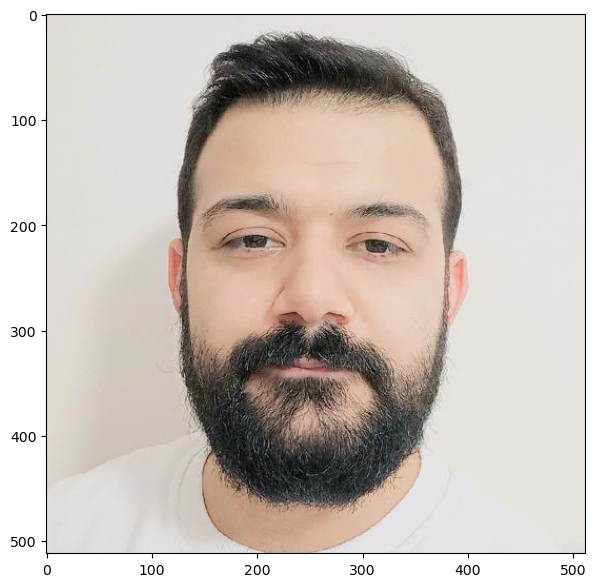

ÖMER


In [108]:
# Süpriz sorularımız olacak
# Acaba kime soracaz ????
# Sen olabilir misin ?????
img_1,isim=resim_degistir(16)

#################################
# -------- JOIN --------#
#################################

**index odaklı birleştirme yapıyor**
1. Eğer anahatar değerin biri indexte biri ise kolonda ise Yöntem 1
2. Eğer anahatar değerin biri indexte biri ise kolonda ise Yöntem 2
3. On = "...."
4. how{‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’
5. lsuffix='....', rsuffix='.....'

In [112]:
df1 = pd.DataFrame({'anahtar1': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar2': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])

In [113]:
df1

,anahtar1,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [114]:
df2

,anahtar2,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


In [117]:
# ilk df in indexlerine göre birleştirme yapıyor, olmayan değerlere NAN değeri atıyor
df1.join(df2)

,anahtar1,df1_col1,anahtar2,df2_col2
index_1,a,1,NaN,NaN
index_2,b,2,b,2.0
index_3,c,3,c,3.0


In [118]:
df3 = df1.join(df2)

In [116]:
df2.join(df1)

,anahtar2,df2_col2,anahtar1,df1_col1
index_2,b,2,b,2.0
index_3,c,3,c,3.0
index_4,d,4,NaN,NaN


## Eğer anahatar değerin biri indexte biri ise kolonda ise Yöntem 1

In [54]:
df2 = pd.DataFrame({'anahtar1': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df3 = pd.DataFrame({'anahtar2': ['b', 'c', 'd'],
                    'df2_col2': range(2,5),
                    "df2_colindex":['index_2','index_3','index_4']}   )

In [55]:
df3

,anahtar2,df2_col2,df2_colindex
0,b,2,index_2
1,c,3,index_3
2,d,4,index_4


In [56]:
df3

,anahtar2,df2_col2,df2_colindex
0,b,2,index_2
1,c,3,index_3
2,d,4,index_4


In [58]:
# index e değer atayarak 
df2=df3.set_index('df2_colindex')
df2

,anahtar2,df2_col2
df2_colindex,,
index_2,b,2
index_3,c,3
index_4,d,4


In [59]:
df1.join(df3)

,anahtar,df1_col1,sayi,anahtar2,df2_col2,df2_colindex
0,a,1,bir,b,2,index_2
1,b,2,iki,c,3,index_3
2,c,3,uc,d,4,index_4


## Eğer anahatar değerin biri indexte biri ise kolonda ise Yöntem 2

## On = "...."
**Eğer anahatar değerin ikiside kolonda ise kullanılabilir

In [277]:
df1 = pd.DataFrame({'anahtar1': ['a', 'b', 'c'],
                    'df1_col1': range(1,4),
                   "df1_colindex":['index_1','index_2','index_3']}   )

df2 = pd.DataFrame({'anahtar2': ['b', 'c', 'd'],
                    'df2_col2': range(2,5),
                    "df2_colindex":['index_2','index_3','index_4']}   )

In [278]:
df1

,anahtar1,df1_col1,df1_colindex
0,a,1,index_1
1,b,2,index_2
2,c,3,index_3


In [279]:
df2

,anahtar2,df2_col2,df2_colindex
0,b,2,index_2
1,c,3,index_3
2,d,4,index_4


In [280]:
df1.join(df2.set_index('anahtar2'),on="anahtar1")

,anahtar1,df1_col1,df1_colindex,df2_col2,df2_colindex
0,a,1,index_1,NaN,NaN
1,b,2,index_2,2.0,index_2
2,c,3,index_3,3.0,index_3


In [281]:
# ortak değişkeni index e atayarak, ortak değişkene göre de birleştirme yapabiliriz.
df1.set_index('anahtar1').join(df2.set_index('anahtar2'))

,df1_col1,df1_colindex,df2_col2,df2_colindex
anahtar1,,,,
a,1,index_1,NaN,NaN
b,2,index_2,2.0,index_2
c,3,index_3,3.0,index_3


## how{‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’

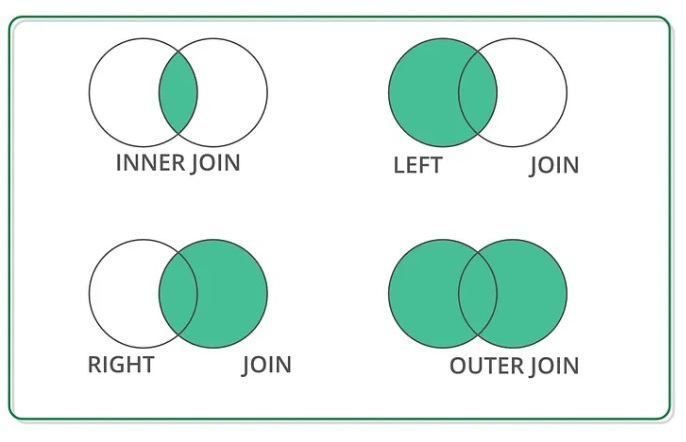

In [201]:
Image.open("join2.jpg")

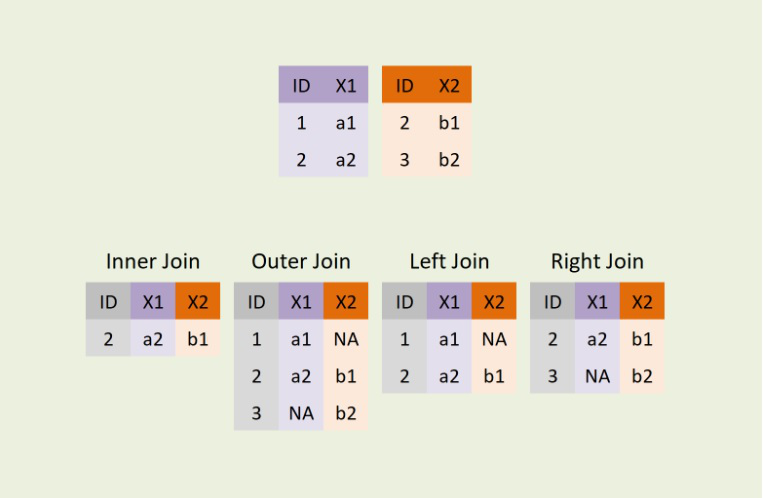

In [202]:
Image.open("join.jpg")

In [209]:
df1 = pd.DataFrame({'anahtar1': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar2': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])

In [189]:
df1

,anahtar1,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [190]:
df2

,anahtar2,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


In [196]:
# default,  how='left'
df1.join(df2, how='left')

,anahtar1,df1_col1,anahtar2,df2_col2
index_1,a,1,NaN,NaN
index_2,b,2,b,2.0
index_3,c,3,c,3.0


In [199]:
# sağdaki df in indexine göre birleştirme
df1.join(df2, how='right')

,anahtar1,df1_col1,anahtar2,df2_col2
index_2,b,2.0,b,2
index_3,c,3.0,c,3
index_4,NaN,NaN,d,4


In [198]:
# butun degerleri gormek istersek
df1.join(df2, how='outer')

,anahtar1,df1_col1,anahtar2,df2_col2
index_1,a,1.0,NaN,NaN
index_2,b,2.0,b,2.0
index_3,c,3.0,c,3.0
index_4,NaN,NaN,d,4.0


In [200]:
# ortak index degerleri gormek istersek
df1.join(df2, how='inner')

,anahtar1,df1_col1,anahtar2,df2_col2
index_2,b,2,b,2
index_3,c,3,c,3


## lsuffix='....', rsuffix='.....'

In [296]:
df1 = pd.DataFrame({'anahtar': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])

In [297]:
df1

,anahtar,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [298]:
df2

,anahtar,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


In [299]:
# df1.join(df2)    
# # hata verir: cunku ortak bir degisken var. join indexlere gore birlestirme yapar.
# # merge fonksiyonundaki gibi _x ve _y eklemez.
# # left_suffix, right_suffix ile hata almaktan kurtuluruz. 

In [300]:
# aynı olan kolonlara sonek ekliyoruz
df1.join(df2, lsuffix='_df1', rsuffix='_df2')

,anahtar_df1,df1_col1,anahtar_df2,df2_col2
index_1,a,1,NaN,NaN
index_2,b,2,b,2.0
index_3,c,3,c,3.0


##  İkiden fazla veri setini birlestirmek icin yine join kullanilabilir

In [121]:
# Ikiden fazla veri setini birlestirmek icin yine join kullanilabilir
# bunu gozlemlemek icin yeni bir DataFrame olusturalim:

df1 = pd.DataFrame({'anahtar1': ['a', 'b', 'c'],
                    'df1_col1': range(1,4)},
                   index=['index_1', 'index_2','index_3'])

df2 = pd.DataFrame({'anahtar2': ['b', 'c', 'd'],
                    'df2_col2': range(2,5)},
                   index=['index_2','index_3','index_4'])

df3 = pd.DataFrame({'anahtar3': [ 'c', 'd',"e"],
                    'df3_col3': range(2,5)},
                   index=['index_3','index_4','index_5'])

df1

,anahtar1,df1_col1
index_1,a,1
index_2,b,2
index_3,c,3


In [122]:
df2

,anahtar2,df2_col2
index_2,b,2
index_3,c,3
index_4,d,4


In [123]:
df3

,anahtar3,df3_col3
index_3,c,2
index_4,d,3
index_5,e,4


In [124]:
df2.join([df1, df3])

,anahtar2,df2_col2,anahtar1,df1_col1,anahtar3,df3_col3
index_2,b,2.0,b,2.0,NaN,NaN
index_3,c,3.0,c,3.0,c,2.0
index_4,d,4.0,NaN,NaN,d,3.0


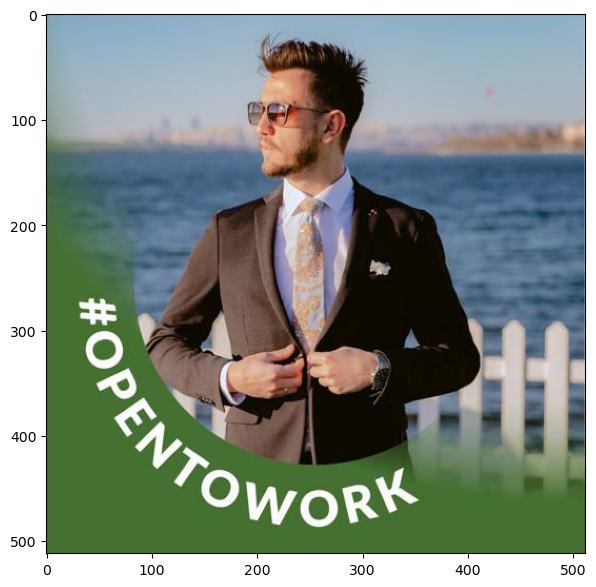

EMRE


In [135]:
# Süpriz Soru 
img_1,isim=resim_degistir(64)